In [15]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# List of all product categories
categories = ['Fruits', 'Animal Products', 'Grains', 'Dairy Products', 'All']

In [ ]:
# Read CSV to pandas dataframe
df = pd.read_csv('all_products.csv')
df

In [18]:
def get_price_difference(start, end, product_type):

  df = pd.read_csv('all_products.csv')

  # Get product prices between start and end date
  prd_price = df.copy(deep=True)
  prd_price = prd_price.query(f'year >= {start-1} & year <= {end}')
  prd_price = prd_price.iloc[:, 1:]

  if product_type == 'All':
    # Rename values in products column to 'All_products' to get the mean of all values later.
    prd_price['category'] = 'All_products'

  else:
    prd_price = prd_price.query(f'category == \"{product_type}\"')

  # Get the mean of all products prices per month-year
  prd_price = prd_price.groupby(by=['category', 'year','month']).mean()


  # Get average difference of all product prices in period 2016 - 2019
  avg_diff = prd_price.pct_change().reset_index().query(f'year >= {start} & year <= {end}')

  # Make datetime from month - year columns
  avg_diff['datetime'] = pd.to_datetime(avg_diff['year'].astype(str) + 
                                        '-' + avg_diff['month'].astype(str),
                                        format='%Y/%m')

  # Drop month - year columns
  avg_diff = avg_diff.drop(['month', 'year'], axis=1)

  return avg_diff

In [ ]:
# Get average difference the 3 years before covid
pre_covid_prices_all_products = get_price_difference(2017, 2019, 'All')
pre_covid_prices_all_products

In [20]:
# Get average difference during the 3 years of covid
covid_prices_all_products = get_price_difference(2020, 2022, 'all')

<ipython-input-49-f9d96cc274d6>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
<ipython-input-49-f9d96cc274d6>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


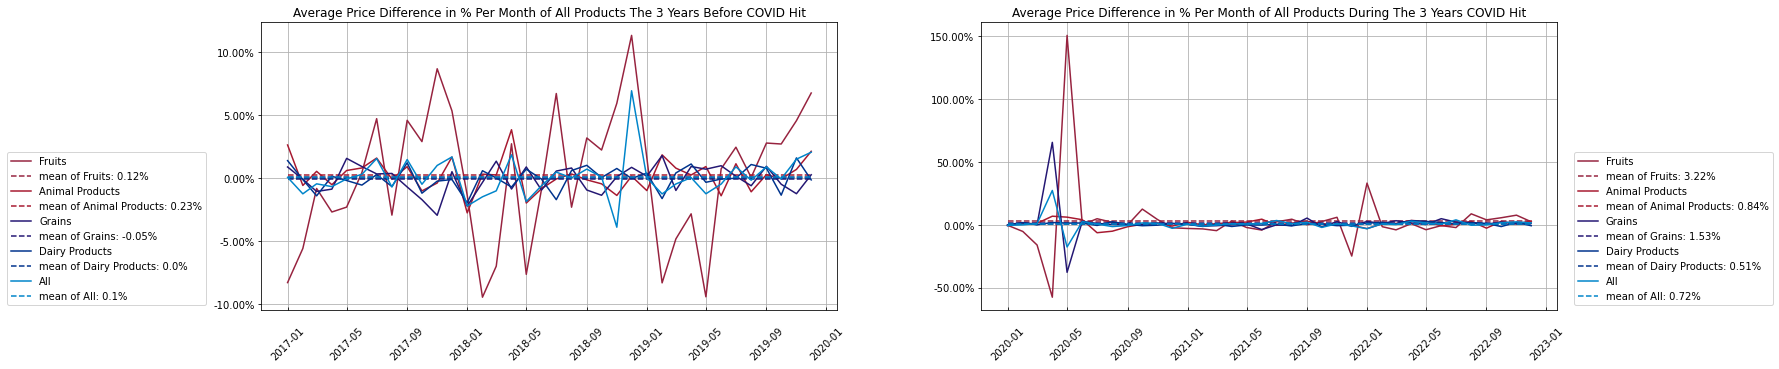

In [49]:
category_colors = {
    'Fruits': '#97233f',
    'Animal Products': '#a71930', 
    'Grains': '#241773', 
    'Dairy Products': '#00338d', 
    'All':'#0085ca'
}

# Creating a canvas to draw
fig = plt.figure(figsize=(10,10))

# Now create an plotting area using add_axes()
# The add_axes takes a list of 4 parameters (left, bottom, width and height). 
# All quantities are in fractions of figure width and height.
ax1 = fig.add_axes([0, 0, .8, 0.40]) 
ax2 = fig.add_axes([1, 0, .8, 0.40]) 

# adding items to the first subplot
for category in categories:
  df1 = get_price_difference(2017, 2019, category)
  ax1.plot(df1['datetime'].sort_values(), df1['us_city_average_retail_price'], label = category, color = category_colors.get(category))
  ax1_y_mean = [np.mean(df1['us_city_average_retail_price'])]*len(df1['datetime'])
  ax1.plot(df1['datetime'],ax1_y_mean, label = f'mean of {category}: {(str(round(ax1_y_mean[1]*100, 2)))}%', linestyle='--', color = category_colors.get(category))
ax1.grid('on')
ax1.set_title("Average Price Difference in % Per Month of All Products The 3 Years Before COVID Hit")
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax1.tick_params(axis="x", direction="in", rotation=45, pad=15)

# Adding items to the second subplot
for category in categories:
  df2 = get_price_difference(2020, 2022, category)
  ax2.plot(df2['datetime'].sort_values(), df2['us_city_average_retail_price'], label = category, color = category_colors.get(category))
  ax2_y_mean = [np.mean(df2['us_city_average_retail_price'])]*len(df2['datetime'])
  ax2.plot(df2['datetime'],ax2_y_mean, label = f'mean of {category}: {(str(round(ax2_y_mean[1]*100, 2)))}%', linestyle='--', color = category_colors.get(category))
ax2.grid('on')
ax2.set_title("Average Price Difference in % Per Month of All Products During The 3 Years COVID Hit")
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax2.tick_params(axis="x", direction="in", rotation=45, pad=15)

# Add legend
ax1.legend(loc='lower left', bbox_to_anchor=(-.45, 0))
ax2.legend(loc='lower left', bbox_to_anchor=(1.02, 0))

# draw
plt.show()